In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
cricket_df=pd.read_csv('Cricket.csv',encoding='ISO-8859-1')

In [14]:
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [12]:
cricket_df.shape

(79, 13)

In [7]:
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [29]:
cri_cluster=cricket_df[['Player','Ave','SR']]

In [17]:
selected_df=cricket_df[['Ave','SR']]

In [18]:
selected_df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [22]:
scaled_df=pd.DataFrame(scaler.fit_transform(selected_df),columns=['Average','Strike Rate'])

In [23]:
scaled_df.head()

,Average,Strike Rate
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [15]:
from sklearn.cluster import KMeans

In [24]:
kmeans=KMeans(n_clusters=4,max_iter=100)

In [27]:
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.labels_

array([3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 3, 1, 3, 1, 2, 0, 0, 2, 0,
       1, 0, 2, 3, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 1, 1, 3, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1])

In [30]:
cri_cluster['ClusterID']=kmeans.labels_

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
cri_cluster.head(50)

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),44.83,86.23,3
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,2
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0
9,BC Lara (ICC/WI),40.48,79.51,0


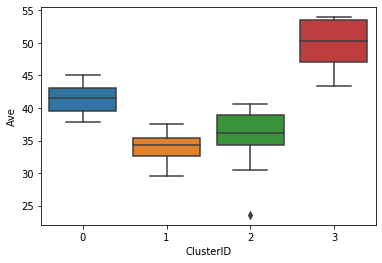

In [33]:
sns.boxplot('ClusterID','Ave',data=cri_cluster)

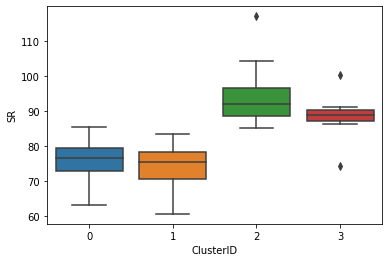

In [34]:
sns.boxplot('ClusterID','SR',data=cri_cluster)

In [175]:
from scipy.cluster.hierarchy import dendrogram,cut_tree,linkage

In [176]:
merges=linkage(scaled_df,method='complete')

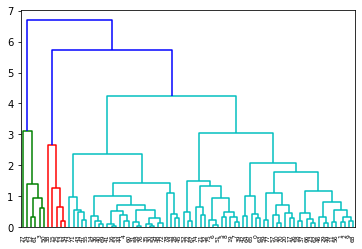

In [179]:
dendrogram(merges)
plt.show()

In [180]:
cluster_labels=cut_tree(merges,n_clusters=4)

In [181]:
cri_cluster['Cluster_labels']=cluster_labels

C:\Users\divakar.kareddy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [182]:
cri_cluster.head(50)

,Player,Ave,SR,ClusterID,Cluster_labels
0,SR Tendulkar (INDIA),44.83,86.23,3,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0,0
2,RT Ponting (AUS/ICC),42.03,80.39,0,0
3,ST Jayasuriya (Asia/SL),32.36,91.20,2,1
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1,2
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0,0
9,BC Lara (ICC/WI),40.48,79.51,0,0


In [183]:
cri_cluster.tail(50)

,Player,Ave,SR,ClusterID,Cluster_labels
29,MJ Clarke (AUS),44.58,78.98,0,0
30,SR Waugh (AUS),32.90,75.91,1,2
31,A Ranatunga (SL),35.84,77.90,1,2
32,Javed Miandad (PAK),41.70,67.01,0,0
33,Younis Khan (PAK),31.24,75.29,1,2
34,HM Amla (SA),50.25,89.05,3,3
35,Saleem Malik (PAK),32.88,76.41,1,2
36,NJ Astle (NZ),34.92,72.64,1,2
37,GC Smith (Afr/SA),37.98,80.81,0,0
38,MG Bevan (AUS),53.58,74.16,3,3


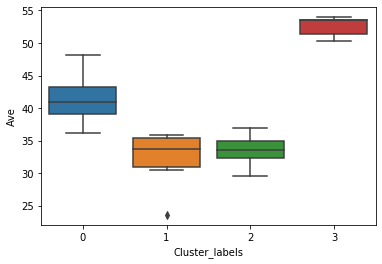

In [187]:
sns.boxplot('Cluster_labels','Ave',data=cri_cluster)

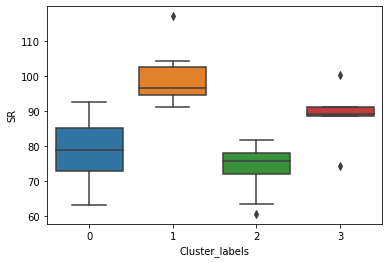

In [188]:
sns.boxplot('Cluster_labels','SR',data=cri_cluster)

In [143]:
n=10
s='*'

In [144]:
for i in range(n,0,-1):
    print(s.ljust((2*i)-1,'*').center((2*n)-1,'#'))
    


*******************
#*****************#
##***************##
###*************###
####***********####
#####*********#####
######*******######
#######*****#######
########***########
#########*#########


In [136]:
'*'.center(5,'#')

'##*##'

In [148]:
n=4

In [149]:
for i in range(1,n+1):
    print(s.ljust((2*i)-1,'*').center((2*n)-1,'#'))
    


###*###
##***##
#*****#
*******


In [150]:
li=[2,1,3,4,1,5,6,1,7]

In [160]:
import numpy as np
from scipy.signal import argrelmin,argrelextrema

In [174]:
list(argrelmin(np.array(li))[0])


[1, 4, 7]

In [172]:
list(argrelextrema(np.array(li),np.less)[0])

[1, 4, 7]